In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:


%matplotlib inline

with open('../../data/features/benign-bow.csv', 'r') as f:
    benign_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/benign-count.csv', 'r') as f:
    benign_count_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-bow.csv', 'r') as f:
    malicious_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-count.csv', 'r') as f:
    malicious_count_data = list(csv.reader(f, delimiter=","))

In [5]:
selected_feature1=['<?php', 'and', 'xor', '__TRAIT__', '__FILE__', '__DIR__',
       '__NAMESPACE__', '__LINE__', 'array', 'const', 'declare',
       'default', 'die', 'elseif', 'enddeclare', 'endfor', 'endforeach',
       'endif', 'endswitch', 'endwhile', 'eval', 'exit', 'extends',
       'foreach', 'include_once', 'isset', 'require_once', 'unset',
       '__FUNCTION__', '__CLASS__', '__METHOD__', 'php_user_filter',
       'implements', 'abstract', 'clone', 'cfunction', 'old_function',
       'file_put_contents', 'file_get_contents', 'assert', '__construct',
       '=>', '(', ')', '_POST', '_GET', 'base64_decode', 'insteadof',
       'goto']
selected_feature2=['alpha', 'numbers', 'splchars', 'totalChars']

In [6]:
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/benign-bow.csv', 'r') as f:
    benign_bow_data = pd.read_csv(f, usecols=selected_feature1)
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/benign-count.csv', 'r') as f:
    benign_count_data = pd.read_csv(f, usecols=selected_feature2)
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/malicious-bow.csv', 'r') as f:
    malicious_bow_data = pd.read_csv(f,  usecols=selected_feature1)
with open('/Users/s2krish/Documents/Documents-Bk/SriniK/Jk-Paper/2020/arcriam/data/multiline/malicious-count.csv', 'r') as f:
    malicious_count_data = pd.read_csv(f, usecols=selected_feature2)

In [7]:
benign_bow_data

<?php  and  xor  __TRAIT__  __FILE__  __DIR__  __NAMESPACE__  __LINE__  \
0         0    0    0          0         0        0              0         0   
1         0    1    0          0         0        0              0         0   
2         0    1    0          0         0        0              0         0   
3         0    1    0          0         0        0              0         0   
4         0    2    0          0         0        0              0         0   
...     ...  ...  ...        ...       ...      ...            ...       ...   
4175      0    0    0          0         0        0              0         0   
4176      0    3    0          0         0        0              0         0   
4177      0    0    0          0         0        0              0         0   
4178      0    0    0          0         0        0              0         0   
4179      0    0    0          0         0        0              0         0   

      array  const  ...  assert  __construct  =>  (  )  _POST  _GET  \
0         0      0  ...       0            0   0  0  0      0     0   
1         0      0  ...       0            0   0  0  0      0     0   
2         0      0  ...       0            0   0  0  0      0     0   
3         0      0  ...       0            0   0  0  0      0     0   
4         0      0  ...       0            0   0  0  0      0     0   
...     ...    ...  ...     ...          ...  .. .. ..    ...   ...   
4175      0      0  ...       0            0   0  0  1      0     0   
4176      0      0  ...       0            0   0  1  1      0     0   
4177      0      0  ...       0            0   0  0  0      0     0   
4178      0      0  ...       0            0   0  0  0      0     0   
4179      0      0  ...       0            0   0  0  0      0     0   

      base64_decode  insteadof  goto  
0                 0          0     0  
1                 0          0     0  
2                 0          0     0  
3                 0          0     0  
4                 0          0     0  
...             ...        ...   ...  
4175              0          0     0  
4176              0          0     0  
4177              0          0     0  
4178              0          0     0  
4179              0          0     0  

[4180 rows x 49 columns]

In [8]:
benign_bow_data = np.array(benign_bow_data[1:], dtype=np.float)
benign_count_data = np.array(benign_count_data[1:], dtype=np.float)

In [9]:
benign_data=np.concatenate([benign_bow_data, benign_count_data], axis=1)
benign_target=[0] * benign_data.shape[0]
benign_data=np.hstack((benign_data, np.atleast_2d(benign_target).T))
benign_data

array([[  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       [  0.,   1.,   0., ...,  22.,  99.,   0.],
       ...,
       [  0.,   0.,   0., ...,   1.,  10.,   0.],
       [  0.,   0.,   0., ...,  17.,  97.,   0.],
       [  0.,   0.,   0., ...,   6.,  42.,   0.]])

In [10]:
malicious_bow_data = np.array(malicious_bow_data[1:], dtype=np.float)
malicious_count_data = np.array(malicious_count_data[1:], dtype=np.float)

In [11]:
malicious_data=np.concatenate([malicious_bow_data, malicious_count_data], axis=1)
malicious_target=[1] * malicious_data.shape[0]
malicious_data=np.hstack((malicious_data, np.atleast_2d(malicious_target).T))
malicious_data.shape

(691, 54)

In [12]:
all_comments = np.concatenate((benign_data, malicious_data), axis=0)

In [13]:
all_comments

array([[  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       [  0.,   1.,   0., ...,  22.,  99.,   0.],
       ...,
       [  0.,   0.,   0., ...,  29.,  69.,   1.],
       [  1.,   0.,   0., ..., 125., 243.,   1.],
       [  0.,   0.,   0., ...,  29.,  69.,   1.]])

In [14]:
col_count = all_comments.shape[1]
col_count

54

In [15]:
y = all_comments[ : ,col_count-1]
y

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
y.shape

(4870,)

In [17]:
x = all_comments[ :, 0:col_count-1]
x.shape

(4870, 53)

In [18]:
x

array([[  0.,   1.,   0., ...,   0.,  15., 108.],
       [  0.,   1.,   0., ...,   0.,  14.,  73.],
       [  0.,   1.,   0., ...,   0.,  22.,  99.],
       ...,
       [  0.,   0.,   0., ...,   0.,  29.,  69.],
       [  1.,   0.,   0., ...,   3., 125., 243.],
       [  0.,   0.,   0., ...,   0.,  29.,  69.]])

In [19]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [21]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
x_test = scaler.transform(x_test)

In [24]:
y_pred = model.predict(x_test)

In [25]:
model.score(x_train, y_train)

0.992299794661191

In [26]:
model.score(x_test, y_test)

0.9938398357289527

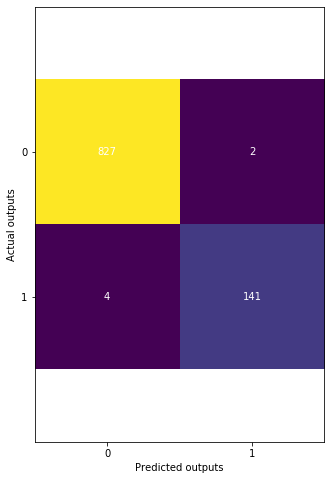

In [27]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',  color='black')
ax.set_ylabel('Actual outputs',  color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -1)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [28]:
print(model.coef_)

[[ 0.50171985 -0.3185301   0.          0.          0.          0.
   0.          0.          0.24549712  0.          0.          0.
   0.13396069  0.          0.          0.          0.          0.
   0.          0.          0.16624001  0.49419946  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.1944045   0.1944045   0.21987551  0.21611498  1.90767137
   1.18341267  0.81769457  0.13717916  0.          0.18764856  0.
   0.          0.04692635  0.21777495 -0.1917035   0.1976244 ]]


In [29]:
model.get_params()

{'C': 0.05,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
malicious_count_data[0]

array([9.2080e+03, 7.5729e+04, 1.5000e+01, 8.4952e+04])

In [31]:
print(list(zip(model.coef_, )))

[(array([ 0.50171985, -0.3185301 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.24549712,  0.        ,
        0.        ,  0.        ,  0.13396069,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.16624001,  0.49419946,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.1944045 ,  0.1944045 ,  0.21987551,
        0.21611498,  1.90767137,  1.18341267,  0.81769457,  0.13717916,
        0.        ,  0.18764856,  0.        ,  0.        ,  0.04692635,
        0.21777495, -0.1917035 ,  0.1976244 ]),)]


In [32]:
print(model.coef_.shape)

(1, 53)


In [34]:
allfeatures=np.concatenate([selected_feature1, selected_feature2], axis=0)
print(list(zip(allfeatures, model.coef_[0])))

[('<?php', 0.5017198477790615), ('and', -0.31853009548866434), ('xor', 0.0), ('__TRAIT__', 0.0), ('__FILE__', 0.0), ('__DIR__', 0.0), ('__NAMESPACE__', 0.0), ('__LINE__', 0.0), ('array', 0.24549712167796459), ('const', 0.0), ('declare', 0.0), ('default', 0.0), ('die', 0.13396068580455148), ('elseif', 0.0), ('enddeclare', 0.0), ('endfor', 0.0), ('endforeach', 0.0), ('endif', 0.0), ('endswitch', 0.0), ('endwhile', 0.0), ('eval', 0.166240009135983), ('exit', 0.4941994608627337), ('extends', 0.0), ('foreach', 0.0), ('include_once', 0.0), ('isset', 0.0), ('require_once', 0.0), ('unset', 0.0), ('__FUNCTION__', 0.0), ('__CLASS__', 0.0), ('__METHOD__', 0.0), ('php_user_filter', 0.0), ('implements', 0.0), ('abstract', 0.0), ('clone', 0.0), ('cfunction', 0.0), ('old_function', 0.0), ('file_put_contents', 0.19440449972759605), ('file_get_contents', 0.19440449972759605), ('assert', 0.21987551456334767), ('__construct', 0.21611498043013616), ('=>', 1.9076713717586586), ('(', 1.1834126702592462), ('